# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ariandi Galuh
- **Email:** riandgh117@gmail.com
- **ID Dicoding:** ariandi_galuh_yFdK

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda berdasarkan kondisi cuaca tahun 2012?
- Seberapa besar pengaruh suhu dan cuaca pada tahun 2012 terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [32]:
bike_day = pd.read_csv("/content/day.csv")
bike_hour = pd.read_csv("/content/hour.csv")

**Insight:**
- Menggunakan pandas untuk membaca dua dataset, yaitu day.csv yang berisi data penyewaan sepeda per hari dan hour.csv
- Dengan dua dataset yang mencakup penyewaan per hari dan per jam, analisis dapat dilakukan dengan perspektif yang berbeda, baik dalam skala harian maupun skala per jam. sehingga memungkinkan analisis yang lebih mendetail terkait faktor yang mempengaruhi penyewaan.

### Assessing Data

In [33]:
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [36]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Menggunakan method `.info()` untuk mengetahui tipe data dan count pada tiap kolom di masing - masing data frame. Berdasarkan output, dapat terlihat bahwa tidak ada **missing value** pada ke dua data frame.

In [37]:
#Klarifikasi untuk memastikan tidak terdapat missing value pada data frame

print(bike_day.isna().sum())
print(bike_hour.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [38]:
#Mengecek nilai duplikat pada tiap data frame

print(f"Jumlah duplikasi pada data frame bike_day : {bike_day.duplicated().sum()} \nJumlah duplikasi pada data frame bike_hour : {bike_hour.duplicated().sum()}")

Jumlah duplikasi pada data frame bike_day : 0 
Jumlah duplikasi pada data frame bike_hour : 0


In [39]:
bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [40]:
bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat kesalahan tipe data untuk kolom `dteday` yang kurang sesuai pada kedua data frame, dimana kolom `dteday` bertipe object yang seharusnya bertipe datetime
- Values kolom kategoris pada dataset ini bertipe numerik sehingga perlu dirubah ke tipe kategoris untuk mempermudah analisis data.

### Cleaning Data

In [41]:
#Mengganti nama kolom agar lebih mudah diakses (preferensi)
column_mapping = {'dteday': 'date', 'yr': 'year', 'mnth' : 'month', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}

bike_day.rename(columns=column_mapping, inplace=True)

In [42]:
#Mengganti nama kolom agar lebih mudah diakses (preferensi)
column_mapping = {'dteday': 'date', 'yr': 'year', 'mnth' : 'month', 'hr' : 'hour', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}

bike_hour.rename(columns=column_mapping, inplace=True)

In [43]:
#Mengkonversi tipe data object pada kolom date menjadi tipe data datetime
bike_day["date"] = pd.to_datetime(bike_day["date"])
bike_hour["date"] = pd.to_datetime(bike_hour["date"])

In [44]:
def map_categories(df):
    # Mapping values untuk setiap kolom
    month_map = {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    }
    season_map = {
        1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
    }
    weekday_map = {
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    }
    weathersit_map = {
        1: 'Clear/Partly Cloudy',
        2: 'Misty/Cloudy',
        3: 'Light Snow/Rain',
        4: 'Severe Weather'
    }
    year_map = {
        0: '2011', 1: '2012'
    }
    workingday_map = {
        0: 'Holiday', 1: 'Workingday'
    }

    # List kolom yang akan dicocokkan dengan mapping
    columns_to_map = ['month', 'season', 'weekday', 'weathersit', 'year', 'workingday']

    # Menerapkan mapping sesuai kolom yang sesuai
    for column in columns_to_map:
        if column in df.columns:
            if column == 'month':
                df[column] = df[column].map(month_map)
            elif column == 'season':
                df[column] = df[column].map(season_map)
            elif column == 'weekday':
                df[column] = df[column].map(weekday_map)
            elif column == 'weathersit':
                df[column] = df[column].map(weathersit_map)
            elif column == 'year':
                df[column] = df[column].map(year_map)
            elif column == 'workingday':
                df[column] = df[column].map(workingday_map)

    return df

In [45]:
def convert_to_categories(df):
    # List kolom yang akan diubah tipe datanya menjadi 'category'
    columns_to_convert = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

    # Loop melalui setiap kolom dan mengubah tipe datanya menjadi 'category'
    for column in columns_to_convert:
        if column in df.columns:
            df[column] = df[column].astype('category')

    return df

In [46]:
bike_day = map_categories(bike_day)
bike_day = convert_to_categories(bike_day)

In [47]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weathersit   731 non-null    category      
 9   temperature  731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  total        731 non-null    int64         
dtypes: categ

**Insight:**
- Dataset ini dapat dibilang cukup bersih karena tidak terdapat missing values, duplicated values, dan kecacatan data lainnya.
- Cleaning data yang dilakukan melibatkan penggantian tipe data kolom date dan konversi value numerik pada kolom kategoris.

## Exploratory Data Analysis (EDA)

In [48]:
# Daftar kolom yang akan diperiksa nilai uniknya
columns_to_map = ['month', 'season', 'weekday', 'weathersit', 'year', 'workingday']

# Loop untuk setiap kolom dalam daftar columns_to_map
for column in columns_to_map:
    # Menampilkan nilai unik (kategori) untuk setiap kolom
    print(f"nilai unik untuk kolom {column} : \n", bike_day[column].cat.categories)


nilai unik untuk kolom month : 
 Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')
nilai unik untuk kolom season : 
 Index(['Fall', 'Spring', 'Summer', 'Winter'], dtype='object')
nilai unik untuk kolom weekday : 
 Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')
nilai unik untuk kolom weathersit : 
 Index(['Clear/Partly Cloudy', 'Light Snow/Rain', 'Misty/Cloudy'], dtype='object')
nilai unik untuk kolom year : 
 Index(['2011', '2012'], dtype='object')
nilai unik untuk kolom workingday : 
 Index(['Holiday', 'Workingday'], dtype='object')


In [49]:
#filter tahun data tahun 2012
bike_day_2012 = bike_day[bike_day['year'] == '2012']

In [50]:
bike_day_2012.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 365 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      366 non-null    int64         
 1   date         366 non-null    datetime64[ns]
 2   season       366 non-null    category      
 3   year         366 non-null    category      
 4   month        366 non-null    category      
 5   holiday      366 non-null    category      
 6   weekday      366 non-null    category      
 7   workingday   366 non-null    category      
 8   weathersit   366 non-null    category      
 9   temperature  366 non-null    float64       
 10  atemp        366 non-null    float64       
 11  humidity     366 non-null    float64       
 12  windspeed    366 non-null    float64       
 13  casual       366 non-null    int64         
 14  registered   366 non-null    int64         
 15  total        366 non-null    int64         
dtypes: category

### Explore Hubungan Kondisi Cuaca terhadap Penyewaan Sepeda

In [51]:
bike_day_2012.groupby("weathersit").agg({
    'total' : ['sum', 'mean']
})

<ipython-input-51-dc55091fbd63>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day_2012.groupby("weathersit").agg({


total             
                         sum         mean
weathersit                               
Clear/Partly Cloudy  1422885  6003.734177
Light Snow/Rain        12757  2126.166667
Misty/Cloudy          613934  4991.333333

Mengelompokkan data (jumlah penyewaan sepeda) berdasarkan kolom weathersit untuk memberikan gambaran umum tentang seberapa besar pengaruh masing-masing kondisi cuaca terhadap total dan rata-rata penggunaan sepeda.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


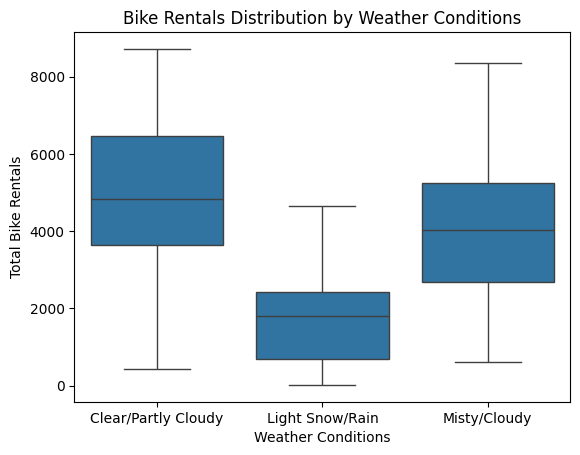

In [52]:
sns.boxplot(data=bike_day, x='weathersit', y='total')
plt.title('Bike Rentals Distribution by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Total Bike Rentals')
plt.show()

Menggunakan boxplot untuk melihat persebaran data

In [53]:
# Mengubah kolom month menjadi tipe kategorikal dengan urutan
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
bike_day_2012['month'] = pd.Categorical(bike_day_2012['month'], categories=month_order, ordered=True)

<ipython-input-53-ceb45fc9bf28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_day_2012['month'] = pd.Categorical(bike_day_2012['month'], categories=month_order, ordered=True)


In [54]:
bike_day_2012.groupby(["month", "weathersit"]).agg({
    "total" : ["sum", "mean", "max", "min"]
})

<ipython-input-54-440a15d08338>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day_2012.groupby(["month", "weathersit"]).agg({


total                             
                              sum         mean     max     min
month weathersit                                              
Jan   Clear/Partly Cloudy   66387  3319.350000  4521.0  1951.0
      Light Snow/Rain           0          NaN     NaN     NaN
      Misty/Cloudy          30357  2759.727273  4097.0  1301.0
Feb   Clear/Partly Cloudy   69858  3881.000000  5062.0  1529.0
      Light Snow/Rain        2169  2169.000000  2169.0  2169.0
      Misty/Cloudy          31110  3111.000000  3922.0  1834.0
Mar   Clear/Partly Cloudy  100286  5278.210526  6871.0  3333.0
      Light Snow/Rain           0          NaN     NaN     NaN
      Misty/Cloudy          64589  5382.416667  8362.0  3194.0
Apr   Clear/Partly Cloudy  144757  6293.782609  7460.0  4862.0
      Light Snow/Rain        1027  1027.000000  1027.0  1027.0
      Misty/Cloudy          28440  4740.000000  6041.0  3214.0
May   Clear/Partly Cloudy  123239  6846.611111  8294.0  5743.0
      Light Snow/Rain           0          NaN     NaN     NaN
      Misty/Cloudy          72626  5586.615385  6883.0  2843.0
Jun   Clear/Partly Cloudy  174967  6998.680000  8120.0  5463.0
      Light Snow/Rain           0          NaN     NaN     NaN
      Misty/Cloudy          27863  5572.600000  7001.0  4127.0
Jul   Clear/Partly Cloudy  158541  6605.875000  8173.0  4672.0
      Light Snow/Rain        4459  4459.000000  4459.0  4459.0
      Misty/Cloudy          40607  6767.833333  7499.0  5870.0
Aug   Clear/Partly Cloudy  143454  7172.700000  7865.0  5464.0
      Light Snow/Rain           0          NaN     NaN     NaN
      Misty/Cloudy          71049  6459.000000  7582.0  4549.0
Sep   Clear/Partly Cloudy  168694  7667.909091  8714.0  6034.0
      Light Snow/Rain           0          NaN     NaN     NaN
      Misty/Cloudy          49879  6234.875000  7415.0  4073.0
Oct   Clear/Partly Cloudy  104538  7467.000000  8156.0  6639.0
      Light Snow/Rain        4661  2330.500000  4639.0    22.0
      Misty/Cloudy          89642  5976.133333  7852.0  1096.0
Nov   Clear/Partly Cloudy  111874  5085.181818  6852.0  2277.0
      Light Snow/Rain           0          NaN     NaN     NaN
      Misty/Cloudy          40790  5098.750000  5986.0  3959.0
Dec   Clear/Partly Cloudy   56290  4690.833333  6606.0  1749.0
      Light Snow/Rain         441   441.000000   441.0   441.0
      Misty/Cloudy          66982  3721.222222  5582.0   920.0

Mengelompokkan data berdasarkan month dan weathersit untuk memberikan gambaran yang jelas mengenai pola penyewaan sepeda dalam berbagai kondisi cuaca sepanjang tahun

### Explore Hubungan Temperature terhadap Penyewaan Sepeda

In [55]:
bike_day_2012.groupby('month').agg({
    'temperature': 'mean',
    'atemp': 'mean',
    'total': ['mean', 'sum']
})

<ipython-input-55-0f9bca1ea6db>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day_2012.groupby('month').agg({


temperature     atemp        total        
             mean      mean         mean     sum
month                                           
Jan      0.275181  0.275102  3120.774194   96744
Feb      0.315337  0.314522  3556.448276  103137
Mar      0.449411  0.438608  5318.548387  164875
Apr      0.468809  0.457387  5807.466667  174224
May      0.612366  0.580510  6318.225806  195865
Jun      0.675111  0.629932  6761.000000  202830
Jul      0.752366  0.697528  6567.967742  203607
Aug      0.711801  0.647534  6919.451613  214503
Sep      0.620083  0.590053  7285.766667  218573
Oct      0.500049  0.485170  6414.225806  198841
Nov      0.336101  0.335395  5088.800000  152664
Dec      0.322880  0.322441  3990.741935  123713

Mengelompokkan data suhu dan penyewaan sepeda berdasarkan month untuk mengetahui hubungan antara suhu dan jumlah penyewaan sepeda setiap bulan

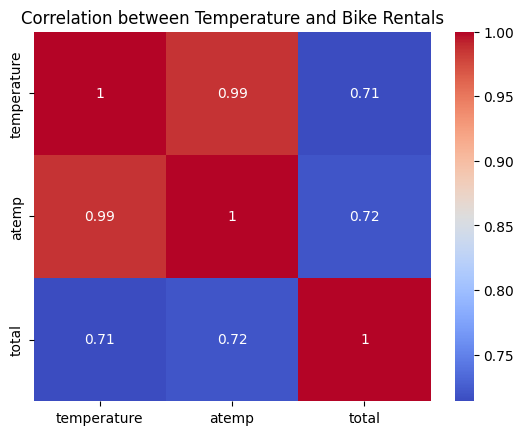

In [56]:
# Korelasi antara suhu dan total penyewaan sepeda
corr_temp = bike_day_2012[['temperature', 'atemp', 'total']].corr()

# Visualisasi korelasi
sns.heatmap(corr_temp, annot=True, cmap='coolwarm')
plt.title('Correlation between Temperature and Bike Rentals')
plt.show()

Menggunakan heatmap untuk mengevaluasi seberapa besar pengaruh suhu terhadap penyewaan sepeda

In [57]:
# Grouping berdasarkan cuaca dan bulan
bike_day_2012.groupby(['weathersit', 'month']).agg({
    'temperature': 'mean',
    'total': 'mean'
}).reset_index()


<ipython-input-57-8a2f7a7ae869>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day_2012.groupby(['weathersit', 'month']).agg({


,weathersit,month,temperature,total
0,Clear/Partly Cloudy,Jan,0.281545,3319.350000
1,Clear/Partly Cloudy,Feb,0.321459,3881.000000
2,Clear/Partly Cloudy,Mar,0.445442,5278.210526
3,Clear/Partly Cloudy,Apr,0.483374,6293.782609
4,Clear/Partly Cloudy,May,0.625278,6846.611111
5,Clear/Partly Cloudy,Jun,0.684633,6998.680000
6,Clear/Partly Cloudy,Jul,0.771979,6605.875000
7,Clear/Partly Cloudy,Aug,0.718208,7172.700000
8,Clear/Partly Cloudy,Sep,0.605606,7667.909091
9,Clear/Partly Cloudy,Oct,0.497321,7467.000000


Menyajikan ringkasan informasi tentang bagaimana suhu dan penyewaan sepeda bervariasi berdasarkan kondisi cuaca dan bulan

**Insight:**
- Kondisi cuaca Clear/Partly Cloudy menghasilkan jumlah penyewaan sepeda tertinggi, diikuti oleh Misty/Cloudy, sementara kondisi Light Snow/Rain menyebabkan penurunan signifikan dalam jumlah penyewaan, mencerminkan dampak negatif cuaca buruk terhadap penggunaan sepeda.
- Terdapat korelasi positif antar suhu dengan penyewaan sepeda sebesar 71% - 72%. Ini mengindikasikan bahwa semakin tinggi suhu, jumlah penyewaan sepeda cenderung meningkat, meskipun ada faktor lain yang mungkin juga memengaruhi jumlah penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda berdasarkan kondisi cuaca tahun 2012?

<ipython-input-58-c31335c28ddb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_usage_by_season = bike_day_2012.groupby(['weathersit', 'month'])['total'].sum().unstack()


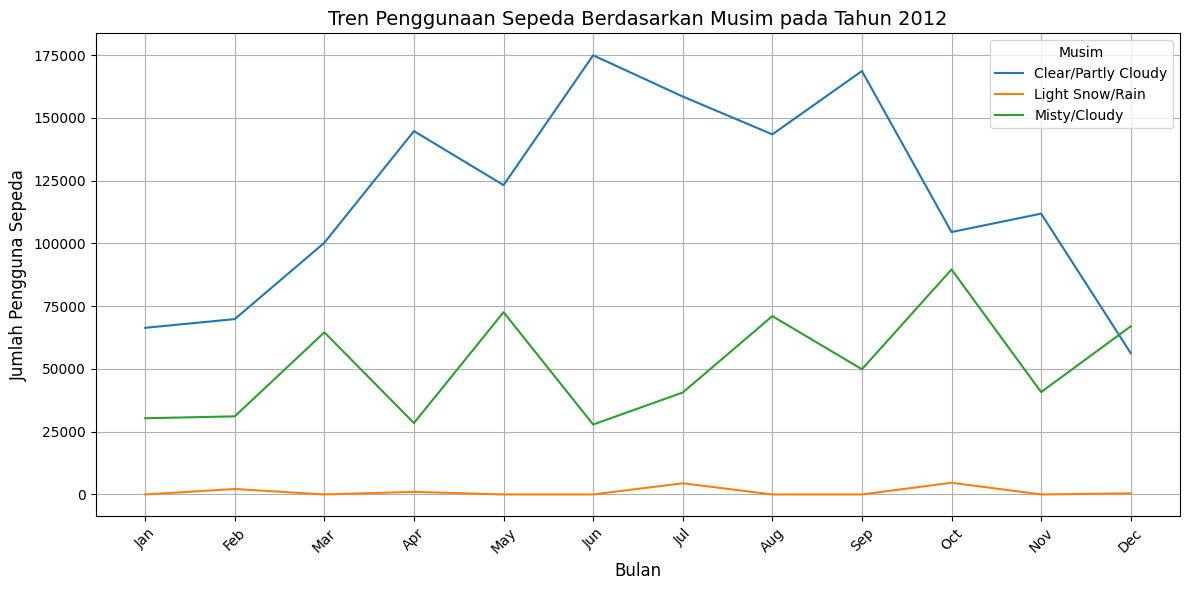

In [58]:
# Grouping berdasarkan musim (weathersit) dan bulan (month), lalu menjumlahkan total pengguna
monthly_usage_by_season = bike_day_2012.groupby(['weathersit', 'month'])['total'].sum().unstack()

# Membuat line chart
plt.figure(figsize=(12, 6))

# Membuat plot untuk setiap musim
for season in monthly_usage_by_season.index:
    plt.plot(monthly_usage_by_season.columns, monthly_usage_by_season.loc[season], label=season)

# Menambahkan judul dan label
plt.title('Tren Penggunaan Sepeda Berdasarkan Musim pada Tahun 2012', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menampilkan legenda dan plot
plt.legend(title='Musim')
plt.tight_layout()
plt.show()


Penggunaan Line Chart untuk memvisualisasikan tren penyewaan sepeda dapat membantu dalam mengidentifikasi bagaimana jumlah penyewaan sepeda berubah setiap bulan. Dalam kasus ini, tren penyewaan sepeda dilihat berdasarkan kondisi cuaca

### Pertanyaan 2: Seberapa besar pengaruh suhu dan cuaca pada tahun 2012 terhadap penyewaan sepeda?

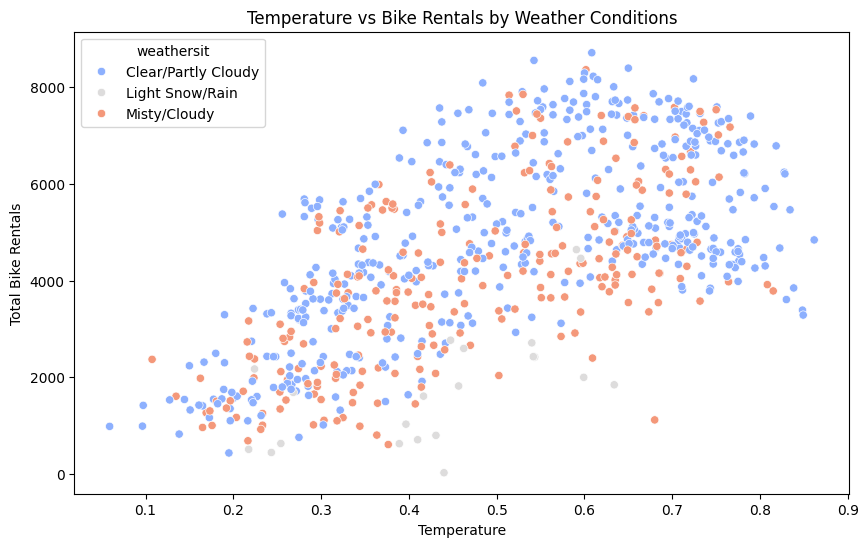

In [59]:
# Visualisasi scatter plot suhu vs penyewaan sepeda
plt.figure(figsize=(10,6))
sns.scatterplot(data=bike_day, x='temperature', y='total', hue='weathersit', palette='coolwarm')
plt.title('Temperature vs Bike Rentals by Weather Conditions')
plt.xlabel('Temperature')
plt.ylabel('Total Bike Rentals')
plt.show()

Penggunaan Scatter Plot pada kasus ini berfungsi untuk memberikan insight tentang bagaimana suhu mempengaruhi keputusan orang untuk menyewa sepeda, dengan melihat perbedaan pola penyewaan di berbagai kondisi cuaca.

**Insight:**
- Cuaca cerah atau sebagian berawan (Clear/Partly Cloudy) mendorong penggunaan sepeda tertinggi, terutama selama musim semi hingga awal musim gugur (April hingga September). Sebaliknya, hujan ringan atau salju (Light Snow/Rain) hampir tidak menarik pengguna sepeda pada tahun 2012.
- Suhu memiliki hubungan positif dengan penyewaan sepeda, dengan penyewaan tertinggi terjadi pada suhu sedang hingga tinggi (sekitar 0.4–0.7). Cuaca cerah meningkatkan penyewaan sepeda secara signifikan, sementara hujan dan salju sangat mengurangi minat penyewaan sepeda, meskipun suhu meningkat.

## Analisis Lanjutan (Opsional)

## Conclusion

- Question 1 : Bagaimana tren penggunaan sepeda berdasarkan kondisi cuaca tahun 2012?

    Cuaca memiliki dampak signifikan terhadap penggunaan sepeda, dengan cuaca cerah yang mendorong jumlah pengguna tertinggi, sedangkan kondisi cuaca hujan atau salju sangat membatasi penggunaan.
    - Cuaca Clear/Partly Cloudy (Biru): Penggunaan sepeda paling tinggi terjadi saat cuaca cerah atau sebagian berawan. Jumlah pengguna meningkat signifikan selama musim semi dan musim panas (April hingga September), dengan puncaknya di bulan Juni dan Agustus. Setelah itu, jumlah pengguna mulai menurun saat memasuki musim gugur dan musim dingin.
    - Cuaca Misty/Cloudy (Hijau): Penggunaan sepeda dalam cuaca berkabut atau mendung cenderung lebih rendah dibandingkan cuaca cerah. Meski demikian, ada pola fluktuasi yang cukup konsisten di mana jumlah pengguna meningkat pada bulan Mei dan Agustus, lalu menurun di bulan-bulan lain. Secara umum, tren ini menunjukkan pengguna sepeda masih cukup aktif meski cuaca berkabut.
    - Cuaca Light Snow/Rain (Oranye): Saat hujan ringan atau salju, jumlah pengguna sepeda sangat sedikit sepanjang tahun. Bahkan di musim-musim puncak (April-September), hampir tidak ada peningkatan yang signifikan, menunjukkan bahwa hujan ringan atau salju menjadi faktor besar yang mengurangi minat bersepeda.


- Question 2 : Seberapa besar pengaruh suhu dan cuaca pada tahun 2012 terhadap penyewaan sepeda?

    Suhu dan cuaca cerah memiliki korelasi positif yang kuat terhadap penyewaan sepeda. Makin hangat suhu dan makin cerah cuaca, makin banyak penyewaan sepeda.

    Secara umum, terdapat tren positif antara suhu dan jumlah penyewaan sepeda. Ketika suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat hingga suhu tertentu (sekitar 0.7). Setelah itu, terjadi sedikit penurunan penyewaan meskipun suhu masih relatif tinggi. Ini menunjukkan bahwa suhu moderat (sedang) hingga tinggi mendorong penggunaan sepeda yang lebih besar, namun terlalu panas bisa mengurangi kenyamanan pengguna sepeda.